*This assignment was made in Google Colab*<br><br>
CE310 Evolutionary Computation and Genetic Programming<br>
Drew Berry RegNo: 2000878<br><br>
**Assignment: Programming Assignment and mini project Part 1 (of 2) – Implementation of the basic functionality for Evolutionary Algorithms**

# ASCII Art (1.3.1 and 1.3.2)

## Imports, Constants and File-reading

In [12]:
import time
import random
import numpy as np
import os
from PIL import Image

bitstring_length = 85
target = []

## Variable for minimising or maximising the fitness function
maximising = True

## Variable for using single or double crossover
single = True

The following method is for file-reading and interpreting:

In [13]:
## Reads the given ASCII art from its file
def readFile():
    notebook_path = os.path.abspath("CE310-Assignment-Part1.ipynb")
    ascii_file = os.path.join(os.path.dirname(notebook_path), "ASCII-GA.txt")

    f = open(ascii_file, "r")
    target_string = ""
    for i in range(5):
      target_string += f.readline()[:-1]

    ## Creates an array for the target ASCII art
    for i in range(bitstring_length):
      target.append((int)(target_string[i]))

The following method is for setting the target if file-reading fails

In [14]:
def setTarget():
    target_string = "0001111000001100000100001000100100010000000010000100010011100111111000011101001000010"
    ## Creates an array for the target ASCII art
    for i in range(bitstring_length):
       target.append((int)(target_string[i]))

Here setTarget( ) should be commented out. However, if file-reading fails, comment out readFile( ) and uncomment setTarget( ).

In [15]:
readFile()
#setTarget()

## Hyper-parameters

In [16]:
xo_prob  = 0.7                    ## Probability that crossover will occur in a given generation
mut_prob = 1/bitstring_length     ## Probability that mutation will occur to a given individual

no_generations = 10000     ## Number of generations that the program will run for, unless interrupted
no_population  = 100       ## Constant number of individuals in the population
no_tournament  = 3         ## Number of random individuals competing in a given tournament

### Hyper-parameter Analysis

*In all testing the ASCII-GA.txt file (from moodle) was used, this has a bitstring_length of 85*<br><br>

**Standard Values**<br>
> xo_prob  = 0.7<br>
mut_prob = 1/bitstring_length<br>
no_generations = 10000<br>
no_population  = 100<br>
no_tournament  = 3

***With these values, a solution is usually found in 1000 to 1500 generations.***
<br><br>

**xo_prob**

> An xo_prob of 1 means that crossover will always occur each generation, whereas an xo_prob of 0 means that crossover will never occur, only cloning.<br><br> A value of 1 slightly lowers the number of generations needed to find a solution compared to the standard value, shown here: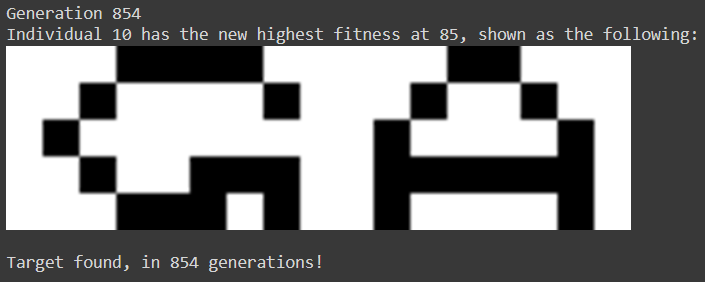<br><br> However, a value of 0 significantly increases the number of generations needed to find a solution, shown here: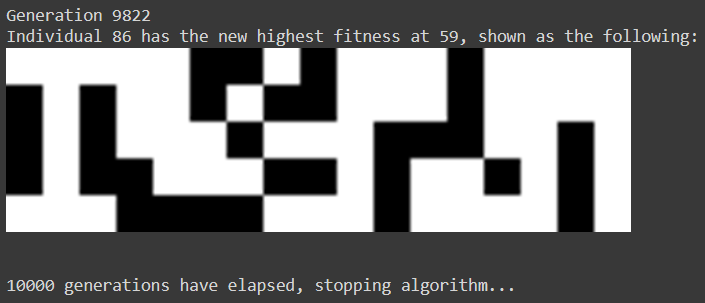
<br>This is due to the now complete randomness of the program, however in few very lucky scenarios, a solution can be found quite quickly.
<br><br>Other tested tested values include:
>> 0.2 which takes over 100,000 generations.<br>0.4 which roughly takes 2000 to 4000 generations.<br>0.6 which roughly takes 1600 to 2000 generations.<br>0.8 which roughly takes 1000 to 1200 generations.

<br><br>


**mut_prob**
>A mut_prob of 1 means that everytime mutation is performed on an offspring, all of its bits are flipped, whereas a mut_prob of 0 means that mutation never occurs.
<br><br>
A value of 1 is practically useless, on average it finds a maximum fitness of roughly 55 in 100,000 generations, but this value mainly comes from the initialisation of the population.<br>A value of 0 is also practically useless, on average it finds a maximum fitness of roughly 67, it usually finds this after 300 to 500 generations.<br>
>>This value could be somewhat useful if a different selection method was used, tournaments find individuals with the highest fitness to crossover so the program eventually hits a cap on the values that are generated, whereas if a random selection is used, there would be a higher chance of finding a solution.
>>
<br> Any mut_prob value below the standard 1/bitstring_length is not worth using, it just makes the solution harder to find. Furthermore, a value of 5 times the standard unnecessarily increases the number of generations needed to find a soultion, taking more than 100,000 on average.<br><br>**In conclusion, any value too different from 1/bitstring_length isn't worth using.**

<br><br>


**no_generations**

> This variable doesn't affect the performance of the algorithm, it just allows you to limit the number of generations that the program runs for, which is useful in testing. 
>>The value of no_generations should only be above 10,000 when using some extreme hyper-parameters.

<br><br>



**no_population**
>*This variable must be greater than no_tournament.*<br><br> *A no_population of 1 cannot be used as the program will get stuck in an infinite loop in the Crossover methods.*<br><br>A value of 2 allows for generations to occur at the fastest rate, however it takes a large number more generations to find a solution. A solution will always eventually be found but takes a while as the mutation is both helping and hindering the progress.<br><br>A value of 10 actually makes the algorithm find a solution in significantly less generations, averaging between 500 and 900 generations, shown here:<br>
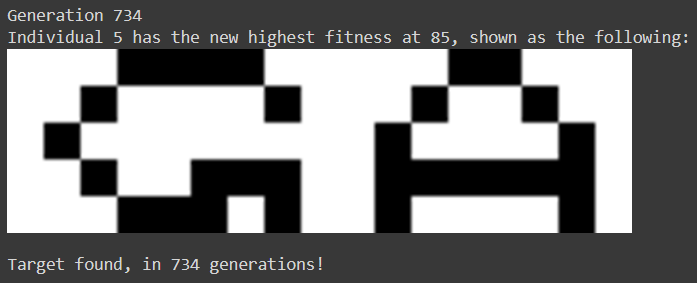<br><br>A value of 1000 (with a no_tournament equal to 3) takes significantly more generations to find a solution, shown here:
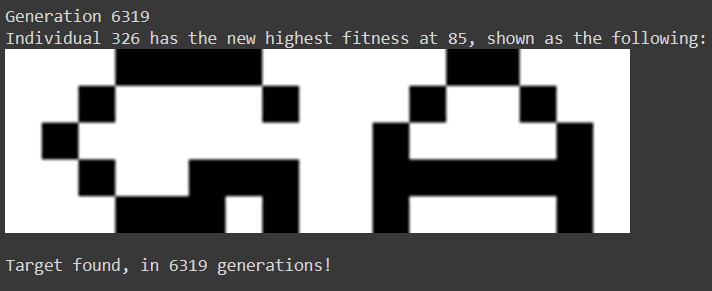<br>
>>If you scale the no_tournament with the no_population, so make no_tournamet equal to 30 when no_population is equal to 1000, you get an average of 1600 generations to find a solution.
>>
<br>Other values tested include:
>>A value of 5 gives a large variation in the number of generations to find a solution, somewhere between 800 and 2500.<br>A value of 20 is quite similar to 10 giving a range of 600 to 1000 generations.
>>
>
<br><br>

**no_tournament**
>*This variable must be less than no_population.*<br><br>*A no_tournament of 0 cannot be used as it would break the algorithm.*<br><br>A value of 1 means that selection will be completely random, no tournament will be held, which gives the same results as having a xo_prob of 0, the program becomes a game of luck.<br><br>A value of 50 significantly decreases the number of generations needed to find a solution to on average between 250 and 400, shown here:<br>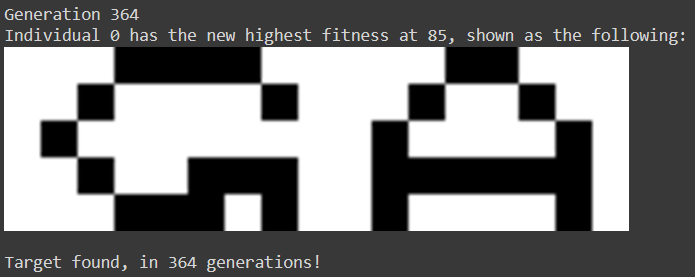<br><br>Other values tested include:
>>A value of 2 averages between 2000 and 2500 generations.<br>A value of the no_population minus 1, in this instance 99, averages between 400 and 600 generations.
>
<br><br>


**Optimal Parameters**
> xo_prob  = 1<br>
mut_prob = 1/bitstring_length<br>
no_generations = 1000<br>
no_population  = 10<br>
no_tournament  = 5<br>
>>This gives an average between 250 and 400 generations, shown here:<br>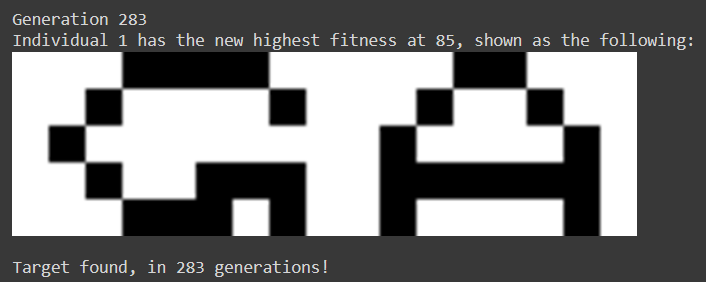<br>These parameters are so successful because when crossing over, there is a high chance to find two parents that have the highest fitness in the population, creating offspring with high fitness. Also having a small population allows the program to remove the weak individuals quickly.<br><br>However, this set of parameters has one drawback, the variance of the number of generation to find a solution is relatively large, giving values between 200 and 800.

## Methods

### Fitness

To maximise fitness, the maxFitness( ) method compares each bit in the current individual with the corresponding bit in the target bitstring; when these bits are equal, increase the fitness by 1.<br>

> This means that an individual with the worst possible fitness (furthest away from the target) will have a fitness of 0, whereas the individual with the best fitness (equal to the target) would have a fitness equal to the length of the bitstring.

In [17]:
def maxFitness(chromosome):
    fit = 0
    for i in range(bitstring_length):
        if chromosome[i] == target[i]:
            fit += 1
    return fit

To minimise fitness, the minFitness( ) method does the same comparison as maxFitness, however when the compared bits are not equal, increase the fitness by 1.

>This means that an individual that is equal to the target will have a fitness of 0, whereas the individual that is furthest away from the target would have a fitness equal to the length of the bitstring.

I have implemented the minising fitness function in this way so that the tournament function (as well as other parts of the program) doesn't need to be changed for both min and max, as everything would need to be inverted in new function. However, when the fitness is displayed to the user, the fitness is subtracted from the bitstring length to show the actual minimised fitness (see line 13 in the highestFitness( ) method).

In [18]:
def minFitness(chromosome):
    fit = 0
    for i in range(bitstring_length):
        if chromosome[i] != target[i]:
            fit += 1
    return fit

The highestFitness( ) method determines which individual in the population has the highest fitness value. Then, if a new highest fitness has been obtained in the current generation, display the individual as ASCII art.

> This method is used at the end of every generation



In [19]:
def highestFitness(g, highest):
    newHighest = highest.copy()
    ## Searches whole population
    for i in range(no_population):
        if (population[i][1] > newHighest[1]):
            newHighest[1] = population[i][1]
            newHighest[0] = i

    ## If a new highest fitness has been obtained, display the individual
    if highest[1] != newHighest[1]:
      print()
      print("Generation " + str(g))
      fit = population[newHighest[0]][1] if maximising else bitstring_length - population[newHighest[0]][1]
      print("Individual " + str(newHighest[0]) + " has the new highest fitness at " + str(fit) + ", shown as the following:")
      imageDisplay(population[newHighest[0]][0])

    return newHighest

### Crossover

The following two functions (singleCrossover( ) and doubleCrossover( ) ) are used to create two offspring by crossing two parents at one or two points.

> Each parent is found through a tournament, and each child replaces an individual found through an inverse tournament.

The locations (or indices) of each child in the population are returned for use in mutation.

In [20]:
## Crosses over two parents at a single point
def singleCrossover():
    xo_point = random.randint(1,bitstring_length-1)
    idxs = []
    parent1 = tournament()
    parent2 = tournament()
    ## Stops duplicate parents
    while parent2 == parent1:
        parent2 = tournament()

    ## Creating first offspring
    chromosome = np.hstack([population[parent1][0][:xo_point+1], population[parent2][0][xo_point+1:]])
    idx = tournament(True)
    population[idx] = (chromosome, maxFitness(chromosome)) if maximising else (chromosome, minFitness(chromosome))
    idxs.append(idx)

    ## Creating second offspring
    chromosome = np.hstack([population[parent2][0][:xo_point+1], population[parent1][0][xo_point+1:]])
    idx = tournament(True)
    population[idx] = (chromosome, maxFitness(chromosome)) if maximising else (chromosome, minFitness(chromosome))
    idxs.append(idx)

    ## Returns the idxs of the offspring for use in mutation
    return idxs


## Crosses over two parents at two points
def doubleCrossover():
    xo_point1 = random.randint(1,int(bitstring_length/2)-1)
    xo_point2 = random.randint(xo_point1+1,bitstring_length-1)
    idxs = []
    parent1 = tournament()
    parent2 = tournament()
    while parent2 == parent1:
        parent2 = tournament()

    ## Creating first offspring
    chromosome = np.hstack([population[parent1][0][:xo_point1+1], population[parent2][0][xo_point1+1:xo_point2+1], population[parent1][0][xo_point2+1:]])
    idx = tournament(True)
    population[idx] = (chromosome, maxFitness(chromosome)) if maximising else (chromosome, minFitness(chromosome))
    idxs.append(idx)

    ## Creating second offspring
    chromosome = np.hstack([population[parent2][0][:xo_point1+1], population[parent1][0][xo_point1+1:xo_point2+1], population[parent2][0][xo_point2+1:]])
    idx = tournament(True)
    population[idx] = (chromosome, maxFitness(chromosome)) if maximising else (chromosome, minFitness(chromosome))
    idxs.append(idx)
    return idxs

### Other methods

In [21]:
## Initialises the population by creating lists of random binary numbers
def initialisePopulation(n):
    population = []
    for i in range(n):
        chromosome = []
        for i in range(bitstring_length):
          chromosome.append(random.randint(0,1))
        population.append((chromosome, maxFitness(chromosome))) if maximising else population.append((chromosome, minFitness(chromosome)))
    return population


## Displays ASCII art based on the argument
def imageDisplay(array):
    sf = 8 # Scale factor for number of pixels in image
    img = Image.new('L', (17*sf,5*sf), "white")
    pixels = img.load()

    ## Finds each pixel and colours them depending on the value in the arguemnt array
    for y in range(5):
      for x in range(17):
        for i in range(sf):
          for j in range(sf):
            pixels[x*sf+i,y*sf+j] = (255) if array[x + y*17] == 0 else (0)
    
    ## Scales the image with a given width
    width = 500
    wpercent = (width/float(img.size[0]))
    height = int((float(img.size[1])*float(wpercent)))

    img = img.resize((width,height))
    img.show()


## Mutates a given individual
def mutation(idx):
    ## Generates a list of boolean values based on if a random number (between 0 and 1) is below the mutation probability 
    r = (np.random.rand(bitstring_length) <= mut_prob)
    genotype = population[idx][0]
    for i in range(len(genotype)):
        ## Finds the bits that are True and swaps their value in the genotype or individual
        if r[i] == True:
            genotype[i] = 1 if genotype[i] == 0 else 0
    population[idx] = (genotype, maxFitness(genotype)) if maximising else (genotype, minFitness(genotype))


## Using a tournament as the selection method
## When the inv parameter is True, an inverse tournament will be performed
def tournament(inv=False):
    idx = np.random.randint(0, len(population), no_tournament) ## Generates random indices for the tournament competitors
    f = np.array([population[i][1] for i in idx]) ## Finds the fitness of each competitor
    i = f.argmin() if inv else f.argmax()
    return idx[i]


## Holds the main loop
def steadyState():
    highest = [0,0]
    for g in range(no_generations):
        if np.random.random() <= xo_prob:
            idxs = singleCrossover() if single else doubleCrossover()
            mutation(idxs[0])
            mutation(idxs[1])
        else:
            idx = tournament()
            mutation(idx)

        highest = highestFitness(g, highest)
        ## Ends the algorithm early if the target bitstring is found
        if highest[1] == 85:
            print()
            print("Target found, in " + str(g) + " generations!") if maximising else print("Opposite of target found, in " + str(g) + " generations!")
            break


    ## Displays the target ASCII art if it hasn't been found
    if highest[1] != 85:
        print()
        print()
        print(str(no_generations) + " generations have elapsed, stopping algorithm...")
        print()
        print()
        print("This was the target image:")
        print()
        imageDisplay(target)

### Main method

In [22]:
## Record start time
start = time.time()

## Generate a random population
population = initialisePopulation(no_population)

## Run the GA
steadyState()

## Record end time
end = time.time()

print()
print("Time of execution: " + str(round(end - start, 3)) + " seconds")


Generation 0
Individual 23 has the new highest fitness at 53, shown as the following:



Generation 9
Individual 27 has the new highest fitness at 54, shown as the following:



Generation 21
Individual 72 has the new highest fitness at 55, shown as the following:



Generation 37
Individual 98 has the new highest fitness at 56, shown as the following:



Generation 54
Individual 88 has the new highest fitness at 57, shown as the following:



Generation 60
Individual 88 has the new highest fitness at 58, shown as the following:



Generation 104
Individual 57 has the new highest fitness at 59, shown as the following:



Generation 128
Individual 15 has the new highest fitness at 61, shown as the following:



Generation 163
Individual 68 has the new highest fitness at 63, shown as the following:



Generation 197
Individual 52 has the new highest fitness at 64, shown as the following:



Generation 204
Individual 3 has the new highest fitness at 65, shown as the following:



Generation 220
Individual 14 has the new highest fitness at 67, shown as the following:



Generation 298
Individual 63 has the new highest fitness at 68, shown as the following:



Generation 336
Individual 71 has the new highest fitness at 69, shown as the following:



Generation 357
Individual 40 has the new highest fitness at 71, shown as the following:



Generation 398
Individual 50 has the new highest fitness at 75, shown as the following:



Generation 572
Individual 1 has the new highest fitness at 76, shown as the following:



Generation 637
Individual 50 has the new highest fitness at 77, shown as the following:



Generation 674
Individual 45 has the new highest fitness at 78, shown as the following:



Generation 689
Individual 39 has the new highest fitness at 79, shown as the following:



Generation 852
Individual 85 has the new highest fitness at 80, shown as the following:



Generation 914
Individual 90 has the new highest fitness at 81, shown as the following:



Generation 976
Individual 45 has the new highest fitness at 82, shown as the following:



Generation 1039
Individual 10 has the new highest fitness at 83, shown as the following:



Generation 1174
Individual 56 has the new highest fitness at 84, shown as the following:



Generation 1367
Individual 88 has the new highest fitness at 85, shown as the following:



Target found, in 1367 generations!

Time of execution: 0.969 seconds


# Fitness Functions (1.3.3)

*In this section, a video by Top Shelf Technology ( [link](https://www.youtube.com/watch?v=4XZoVQOt-0I)) ) helped me implement the basic genetic algorithm, which i then expanded upon greatly.*<br><br><br>
The test functions implemented here are as follows:
>   Single - objective optimization: Booth function<br>Constrained optimization: Rosenbrock function constrained to a disk
>
This implementation finds the global minimum.

<br>**Genetic algorithm**<br>The program generates a population of individuals that each have a random x and y value, which are between two numbers (or inside the domain). This population is then sorted by fitness, largest to smallest. This fitness is defined as the absolute value of 1 divided the value determined from the test function, so that a value that is closest to 0 will give the highest fitness. If a fitness has  been found that is of significant size, the individuals x and y values must be close to the global minimum. Otherwise, the program takes the x and y values of the top 10% of the sorted population, and creates a new population by random choice of these values and mutation, which then goes into the next generation. These generations run until no_generations have passed, unless the loop is interrupted by a solution.
<br><br>**Representation**<br>I used real floating - point numbers for this implementation.<br><br>
**Hyper - parameters**<br>These didn't need to be tweaked very much, once I settled on 100 for the population and selecting the top 10% of the population for crossover, nothing else needed to be changed.<br>no_generations is defaulted to 10,000 but most runs of the program get a result in less than 200 generations, but there isn't much reason to change this value as when a solution is found the loop breaks.<br><br>
**Solutions**<br>The solutions are quite precise as shown below:
>Booth ( should be {1,3} ):<br>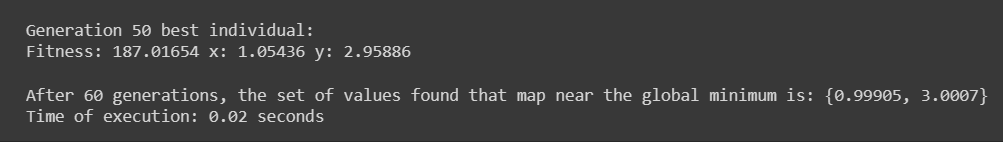<br>Rosenbrock ( should be {1,1} ):<br>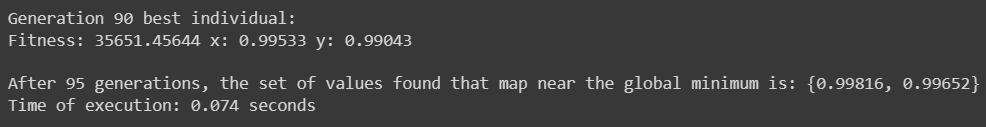<br>

To find a solution anymore precise, the fitness must be left to reach an even higher value, which might require increasing the resolution of mutation.

*The default test function for this section is Booth. In order to change this and use Rosenbrock, you must change two things:*
>*First, comment out line 6 ( domain = [-10,10] ) and uncomment line 7 ( domain = [-1.5,1.5] ).<br> Next, comment out line 21 ( ans = booth(x,y) ) and uncomment line 22 ( ans = rosenbrock(x,y) ).*

*Reverse these changes to use Booth again.*

In [23]:
## Hyper-parameters
no_population = 100
no_generations = 10000

population = []
domain = [-10,10]
#domain = [-1.5,1.5]

## Used to show generations at intervals, e.g. a value of 10 will show every tenth generation
g_factor = no_generations / 1000


def booth(x,y):
    return (x + 2*y - 7) ** 2 + (2*x + y - 5) ** 2

def rosenbrock(x,y):
    return (1-x) ** 2 + 100 * (y - x ** 2) ** 2 if x**2 + y**2 <= 2 else 100000


def fitness(x,y):
    ans = booth(x,y)
    #ans = rosenbrock(x,y)

    ## If the answer is 0 (the minimum), return an large number
    if ans == 0:
        return 100000
    else:
        return abs(1/ans)


## Generates the population where each individual is a random x value and a random y value
def generatePopulation():
    for i in range(no_population):
        population.append((random.uniform(domain[0], domain[1]),
                           random.uniform(domain[0], domain[1])))
        

def mainMethod():
    global population
    start = time.time()
    generatePopulation()

    g = 0
    sortedPopulation = []
    for i in range(no_generations):

        ## Creates a sorted population from highest to lowest fitness
        sortedPopulation = []
        for p in population:
            sortedPopulation.append((fitness(p[0], p[1]), p))
        sortedPopulation.sort()
        sortedPopulation.reverse()

        ## If the fitness is of significant size, break the algorithm early as a solution has been found
        if sortedPopulation[0][0] > 100000:
            g = i
            break

        ## Only displays the generations in intervals of g_factor
        if i % g_factor == 0:
            print("Generation " + str(i) + " best individual:")
            print("Fitness: " + str(round(sortedPopulation[0][0], 5)) + " x: " + str(round(sortedPopulation[0][1][0], 5)) + " y: " + str(round(sortedPopulation[0][1][1], 5)))
            print()

        ## Finds the top 10% of the population, to be used to create the new population
        best_x = []
        best_y = []
        for p in sortedPopulation[:int(no_population/10)]:
            best_x.append(p[1][0])
            best_y.append(p[1][1])
        
        ## Creates a new population based on the best x and y values from the previous population
        newPopulation = []
        for j in range(no_population):
            ## The random.uniform() function calls here are the mutation operators
            newPopulation.append((random.choice(best_x) * random.uniform(0.99, 1.01),
                                  random.choice(best_y) * random.uniform(0.99, 1.01)))
        population = newPopulation

    end = time.time()
    if g != 0:
        print("After " + str(g) + " generations, the set of values found that map near the global minimum is: {" + str(round(sortedPopulation[0][1][0], 5)) + ", " + str(round(sortedPopulation[0][1][1], 5)) + "}")
        print("So the atual global minimum is: {" + str(round(sortedPopulation[0][1][0])) + ", " + str(round(sortedPopulation[0][1][1])) + "}")
    else:
        print("After " + str(no_generations) + " generations, a set of values that map near the global minimum hasn't been found.")
    print("Time of execution: " + str(round(end - start, 3)) + " seconds")

mainMethod()

Generation 0 best individual:
Fitness: 0.12905 x: 2.08817 y: 1.06952

Generation 10 best individual:
Fitness: 0.58089 x: 0.4273 y: 3.93379

Generation 20 best individual:
Fitness: 1.47916 x: 0.43843 y: 3.5965

Generation 30 best individual:
Fitness: 2.01794 x: 0.47567 y: 3.40761

Generation 40 best individual:
Fitness: 2.42547 x: 0.52157 y: 3.39022

Generation 50 best individual:
Fitness: 2.98735 x: 0.5699 y: 3.36291

Generation 60 best individual:
Fitness: 3.83547 x: 0.62017 y: 3.28942

Generation 70 best individual:
Fitness: 5.17733 x: 0.67316 y: 3.27466

Generation 80 best individual:
Fitness: 7.98904 x: 0.73661 y: 3.21846

Generation 90 best individual:
Fitness: 14.68289 x: 0.80555 y: 3.15248

Generation 100 best individual:
Fitness: 37.09125 x: 0.87812 y: 3.09084

Generation 110 best individual:
Fitness: 252.58755 x: 0.95433 y: 3.03013

After 117 generations, the set of values found that map near the global minimum is: {0.99889, 3.00038}
So the atual global minimum is: {1, 3}
Time

# The "Cave of Wonders" Problem (1.3.4)

You and a friend are journeying through an arabian desert, each on a donkey. After a long day, you come across a cave and decide to go inside to set up camp for the night. Little did you know the cave is full of treasure!<br>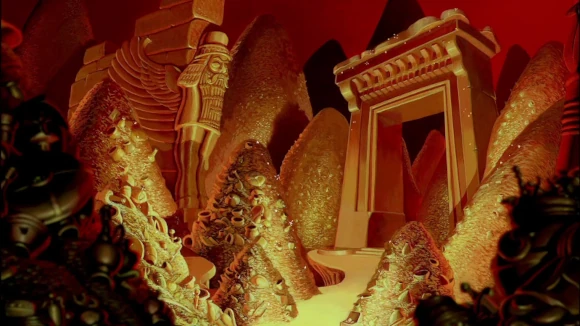 <br> You both decide that you should take as much of the treasure as possible to become rich. However, both donkeys can only carry a limited amount treasure, in their saddlebags. So which items should be taken to make you both the most money.

[Link to image](https://static.wikia.nocookie.net/disney/images/4/43/Aladdin-disneyscreencaps.com-3266.jpg/revision/latest?cb=20140809203636)<br>
[Link to website the image is from](https://disney.fandom.com/wiki/Cave_of_Wonders#Location)

## Formal description of the problem
There are 100 items each with a weight, value, volume and durability. These items may be packed into two saddlebags, however there is a limit to the weight and volume that can be packed. To solve this problem, the value of both saddlebags must be maximised without exceeding the weight and volume limits. A durability below 1 means that the item may break while transporting the items for sale.

## Representation
Each saddlebag is represented as an array of bits with length 100, each bit corresponds to an item. A 1 means that the item is in the saddlebag, whereas a 0 means that it isn't.<br>The items are stored as 4 arrays, weight, value, volume and durability each have their own array. These arrays were populated by randomly generated numbers before the creation of the algorithm.

## Fitness Function
The fitness is defined as the sum of the value times the durability of each item that is in the saddlebags (so is represented as a 1) but only if the weight and volume limits are not broken.<br>With the current items, the maximised fitness should be 1494.

## Genetic Algorithm Behaviour
Every generation, the algorithm decides whether to crossover or clone, which it then performs. Next, mutation is performed. Then, the population is sorted for display to the user. The generations loop is broken if a solution is found.

In [24]:
## Hyper-parameters
xo_prob  = 0.7
mut_prob = 0.02

no_generations = 30000
no_population  = 1000
no_tournament  = 30

In [25]:
## Constants
bitstring_length = 100
max_weight = 100
max_volume = 250

weights      = [12, 2, 9, 19, 15, 2, 9, 16, 8, 14, 16, 16, 15, 12, 14, 18, 3, 3, 16, 14, 7, 3, 16, 9, 17,
                8, 2, 14, 14, 16, 20, 19, 11, 17, 14, 16, 14, 1, 1, 6, 14, 13, 4, 10, 15, 19, 6, 9, 18, 11,
                2, 13, 1, 16, 17, 10, 2, 18, 11, 6, 5, 6, 12, 6, 13, 17, 10, 8, 2, 8, 11, 2, 17, 1, 9, 7,
                10, 18, 17, 5, 18, 18, 19, 17, 2, 8, 19, 17, 5, 1, 11, 7, 2, 13, 7, 4, 4, 8, 9, 7]

values       = [86, 4, 27, 39, 64, 64, 44, 15, 25, 10, 4, 80, 97, 76, 73, 8, 22, 75, 88, 6, 57, 91, 31, 73,
                45, 57, 72, 4, 61, 15, 16, 39, 4, 31, 80, 3, 98, 30, 49, 80, 56, 99, 60, 51, 51, 43, 75, 86,
                19, 52, 25, 95, 72, 56, 46, 67, 13, 49, 41, 46, 89, 99, 70, 87, 99, 3, 29, 70, 82, 19, 25,
                40, 92, 57, 12, 77, 39, 91, 73, 66, 76, 81, 71, 93, 46, 58, 27, 18, 64, 50, 89, 12, 76, 5,
                16, 77, 65, 68, 93, 59]

volumes      = [29, 49, 29, 21, 14, 42, 9, 38, 7, 28, 33, 6, 28, 36, 16, 21, 31, 29, 22, 29, 4, 42, 48, 34,
                6, 36, 48, 38, 14, 49, 33, 43, 7, 14, 49, 2, 30, 17, 26, 28, 11, 13, 45, 31, 26, 3, 39, 27,
                46, 11, 6, 43, 26, 22, 37, 29, 41, 44, 32, 1, 9, 33, 35, 27, 7, 11, 29, 19, 17, 36, 15, 37,
                27, 24, 21, 27, 1, 23, 29, 29, 43, 33, 32, 26, 27, 46, 7, 3, 31, 41, 25, 34, 48, 38, 12, 34,
                4, 8, 13, 8]

durabilities = [0.79, 0.6, 0.75, 0.61, 0.54, 0.59, 0.93, 0.54, 0.84, 0.94, 0.65, 0.82, 0.98, 0.51, 0.95, 0.73,
                0.8, 0.58, 0.83, 0.9, 0.75, 0.58, 0.65, 0.58, 0.84, 0.83, 0.65, 0.92, 0.67, 0.56, 0.67, 0.96,
                0.95, 0.95, 0.91, 0.61, 0.82, 0.94, 0.96, 0.51, 1.0, 0.63, 0.96, 0.98, 0.86, 0.8, 0.81, 0.88,
                0.99, 0.54, 0.93, 0.57, 0.69, 1.0, 0.84, 0.92, 0.91, 0.96, 0.77, 0.76, 0.65, 0.69, 0.91, 0.58,
                0.51, 0.78, 0.84, 0.69, 0.52, 0.8, 0.59, 0.69, 0.55, 0.51, 0.5, 0.55, 0.54, 0.89, 0.52, 0.65,
                0.7, 0.6, 0.97, 0.83, 0.96, 0.65, 0.85, 0.88, 0.86, 0.53, 0.59, 0.58, 0.84, 0.91, 0.59, 0.94,
                0.76, 0.7, 0.75, 0.55]

In [ ]:
## Generate initial population
## Each individual consists of two bitstrings
def initialPopulation(n):
    zero_chance = 90
    population = []
    for i in range(n):
        chromosome1 = []
        chromosome2 = []
        for i in range(bitstring_length):
            ## Checks each bit so that a 1 can't be in both
            num1 = random.randint(0,100)
            if num1 <= zero_chance:
                chromosome1.append(0)
                num2 = random.randint(0,100)
                if num2 <= zero_chance:
                  chromosome2.append(0)
                else:
                  chromosome2.append(1)
            else:
                chromosome1.append(1)
                chromosome2.append(0)
        population.append(((chromosome1, chromosome2), fitnessFunction(chromosome1, chromosome2)))
    return population


def fitnessFunction(chromosome1, chromosome2):
    ## Fitness values
    total_value1 = 0
    total_value2 = 0

    ## Limit the fitness
    weight_sum1 = 0
    volume_sum1 = 0
    weight_sum2 = 0
    volume_sum2 = 0

    for i in range(bitstring_length):
        if weight_sum1 > max_weight or volume_sum1 > max_volume:
            return 0
        if weight_sum2 > max_weight or volume_sum2 > max_volume:
            return 0
        
        if chromosome1[i] == 1:
            total_value1 += values[i] * durabilities[i]
            weight_sum1 += weights[i]
            volume_sum1 += volumes[i]
        if chromosome2[i] == 1:
            total_value2 += values[i] * durabilities[i]
            weight_sum2 += weights[i]
            volume_sum2 += volumes[i]

    return total_value1 + total_value2


def crossover():
    xo_point1 = random.randint(1,bitstring_length-1)
    xo_point2 = random.randint(1,bitstring_length-1)
    idxs = []
    parent1 = tournament()
    parent2 = tournament()
    ## Stops duplicate parents
    while parent2 == parent1:
        parent2 = tournament()

    ## Creating first offspring
    chromosome1 = np.hstack([population[parent1][0][0][:xo_point1+1], population[parent2][0][0][xo_point1+1:]])
    chromosome2 = np.hstack([population[parent1][0][1][:xo_point2+1], population[parent2][0][1][xo_point2+1:]])
    ## Stops both bitstrings having a 1 for any given bit
    for i in range(bitstring_length):
        if chromosome1[i] == 1 and chromosome2[i] == 1:
            choice = random.randint(0,1)
            if choice == 0:
                chromosome1[i] = 0
            else:
                chromosome2[i] = 0
    idx = tournament(True)
    population[idx] = ((chromosome1, chromosome2), fitnessFunction(chromosome1, chromosome2))
    idxs.append(idx)

    ## Creating second offspring
    chromosome1 = np.hstack([population[parent1][0][0][:xo_point1+1], population[parent2][0][0][xo_point1+1:]])
    chromosome2 = np.hstack([population[parent2][0][1][:xo_point2+1], population[parent2][0][1][xo_point2+1:]])
    ## Stops both bitstrings having a 1 for any given bit
    for i in range(bitstring_length):
        if chromosome1[i] == 1 and chromosome2[i] == 1:
            choice = random.randint(0,1)
            if choice == 0:
                chromosome1[i] = 0
            else:
                chromosome2[i] = 0
    idx = tournament(True)
    population[idx] = ((chromosome1, chromosome2), fitnessFunction(chromosome1, chromosome2))
    idxs.append(idx)

    ## Returns the idxs of the offspring for use in mutation
    return idxs


def mutate(idx):
    ## Generates a list of boolean values based on if a random number (between 0 and 1) is below the mutation probability 
    r1 = (np.random.rand(bitstring_length) <= mut_prob)
    r2 = (np.random.rand(bitstring_length) <= mut_prob)
    genotype1 = population[idx][0][0]
    genotype2 = population[idx][0][1]
    for i in range(bitstring_length):
        ## Finds the bits that are True and swaps their value in the genotype or individual
        if r1[i] == True:
            if genotype1[i] == 0 and genotype2[i] == 0:
              genotype1[i] = 1
            elif genotype1[i] == 1:
              genotype1[i] = 0
        if r2[i] == True:
            if genotype1[i] == 0 and genotype2[i] == 0:
              genotype2[i] = 1
            elif genotype2[i] == 1:
              genotype2[i] = 0

    population[idx] = ((genotype1, genotype2), fitnessFunction(genotype1, genotype2))

    
def sorting(p):
    return p[0]


start = time.time()

population = initialPopulation(no_population);
sortedPopulation = []
gen = 0

highest = [0, 0]

for g in range(no_generations):
    if np.random.random() <= xo_prob:
        idxs = crossover()
        mutate(idxs[0])
        mutate(idxs[1])
    else:
        idx = tournament()
        mutate(idx)

    ## Creates a sorted population from highest to lowest fitness
    sortedPopulation = []
    for p in population:
        sortedPopulation.append((p[1], p[0]))
    sortedPopulation.sort(key=sorting)
    sortedPopulation.reverse()

    if sortedPopulation[0][0] > highest[0]:
      highest[0] = sortedPopulation[0][0]
      highest[1] = sortedPopulation[0][1]
    
    if sortedPopulation[0][0] > 1490:
            gen = g + 1
            break

    ## Only shows generations in intervals of 10
    if g % 1000 == 0:
        bitstring1 = ""
        bitstring2 = ""
        for i in range(bitstring_length):
            bitstring1 += str(int(sortedPopulation[0][1][0][i]))
            bitstring2 += str(int(sortedPopulation[0][1][1][i]))
        print("Generation " + str(g) + " best individual:")
        print("Fitness: " + str(round(sortedPopulation[0][0], 3)))
        print("Donkey 1: " + bitstring1)
        print("Donkey 2: " + bitstring2)
        print()

    gen = g + 1
          
end = time.time()

bitstring1 = ""
bitstring2 = ""
for i in range(bitstring_length):
    bitstring1 += str(int(highest[1][0][i]))
    bitstring2 += str(int(highest[1][1][i]))

print("After " + str(gen) + " generations, the algorithm found a solution with the fitness: " + str(highest[0]))
print("This solutions has the following bitstrings:")
print("Donkey 1: " + bitstring1)
print("Donkey 2: " + bitstring2)
print("Time of execution: " + str(round(end - start, 3)) + " seconds")

Generation 0 best individual:
Fitness: 908.41
Donkey 1: 1000000000000000010000000010000000010100000000000000000000000000100010100100001000000000001000000000
Donkey 2: 0000000000000000000010000100000000000001110000000000000000000001000100000000000000000010000000011000

Generation 1000 best individual:
Fitness: 880.45
Donkey 1: 1000000000000000000000000000000010100000000000010000010000000100000000000000000000001000000000010010
Donkey 2: 0100000000000000000000100000000001000100010000000100001000000000000110000000000000000000000000001000

Generation 2000 best individual:
Fitness: 1061.17
Donkey 1: 0001000000010000000000010100000000001010000000100000000000000000100010000000000000000000000000000011
Donkey 2: 0000000000000000000000000000000000000000000000000010100100011001000000010100000000001000000000010100

Generation 3000 best individual:
Fitness: 979.15
Donkey 1: 0000000000000000001000000000000000000001001000100000000000100001000000000000000000010000000000000011
Donkey 2: 0000000010000000

# Self - assessment

## 1.2
I have implemented a steady - state binary GA, and crossover, mutation and selection operators. I have selected appropriate values for the hyper - parameters, which were discovered by vigorous testing.

## 1.3.1
I have implemented the ASCII art representation and fitness function, and was able to quickly evolve a random population to find the given ASCII art, for both maximising and minimising.

## 1.3.2
I have discussed my testing of hyper - parameters in great detail.

## 1.3.3
I have implemented one single-objective and one constrained optimisation function, which were tested and was able to find a correct solution for the minimisation

## 1.3.4
I have come up with an interesting combinatorial optimisation problem which was solve with a GA.